In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Load the dataset
url = 'https://abtinshahidi.github.io/files/train_set.txt'
data = pd.read_csv(url, delimiter=",", header=None, names=["X1","X2", "target"])  

print(data.head(14))


print(data.columns) 
print(data.shape)


           X1         X2 target
0   16.263398  13.299206      r
1    0.775408  23.986692      r
2   29.170503  -3.287474      r
3    6.739044 -28.033329      r
4    3.216100  22.013695      r
5   47.374906   7.925541      g
6   24.064604  14.726109      r
7   12.667897 -16.456068      r
8    4.194880  20.421886      r
9   48.451924   5.783617      g
10  20.390478  -0.429726      r
11  -9.861540  23.623534      r
12   0.467438  24.894588      r
13  -7.275756 -56.286623      g
Index(['X1', 'X2', 'target'], dtype='object')
(685, 3)


In [55]:
# One-hot encoding the target column
one_hot_encoded_target = pd.get_dummies(data['target'], prefix='target')
data = pd.concat([data, one_hot_encoded_target], axis=1)


In [56]:
# Creating new features for project requirements
data['X3'] = data['X1'] ** 2
data['X4'] = data['X2'] ** 2
data['X5'] = data['X1'] * data['X2']

In [57]:
# Create feature column sets for each neural network model
feature_sets = {
    'X3_X4': ['X3', 'X4'],
    'X3_X5': ['X3', 'X5'],
    'X3_X4_X5': ['X3', 'X4', 'X5'],
    'All': ['X1', 'X2', 'X3', 'X4', 'X5']
}

### Create Neural Network Configurations

In [58]:
nn_params = {
    'hidden_layer_sizes': [(8,4),(16,8),(32,16),(64,32)],
    'activation': ['relu', 'tanh','softmax']
}

In [62]:
# setting X, y
X = data[feature_sets['X3_X4']]  # Features
y = data[['target_r', 'target_g', 'target_b']]  # Target variable

In [63]:
from tensorflow.keras.backend import clear_session
import tensorflow as tf


# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Store the results
results = {}

# Initialize and train the tensorflow neural network
for hidden_layer_sizes in nn_params['hidden_layer_sizes']:
    for activation in nn_params['activation']:
        clear_session()  # Clear the previous model and configurations

        print(f"USING PARAMETERS:\nLAYER SIZES: {hidden_layer_sizes}\nACTIVATION: {activation}")
        print("====================================")
        model = Sequential()
        model.add(Dense(hidden_layer_sizes[0], input_dim=X.shape[1], activation=activation))
        model.add(Dense(hidden_layer_sizes[1], activation=activation))
        model.add(Dense(3, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2)
        y_pred = model.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        print("====================================")
        results[(hidden_layer_sizes, activation)] = y_pred


USING PARAMETERS:
LAYER SIZES: (8, 4)
ACTIVATION: relu
Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 6ms/step - accuracy: 0.8796 - loss: 0.6622
Epoch 2/50
55/55 - 0s - 513us/step - accuracy: 0.9179 - loss: 0.2086
Epoch 3/50
55/55 - 0s - 605us/step - accuracy: 0.9416 - loss: 0.1031
Epoch 4/50
55/55 - 0s - 445us/step - accuracy: 0.9945 - loss: 0.0401
Epoch 5/50
55/55 - 0s - 453us/step - accuracy: 0.9964 - loss: 0.0219
Epoch 6/50
55/55 - 0s - 483us/step - accuracy: 0.9945 - loss: 0.0187
Epoch 7/50
55/55 - 0s - 451us/step - accuracy: 0.9964 - loss: 0.0162
Epoch 8/50
55/55 - 0s - 442us/step - accuracy: 0.9964 - loss: 0.0166
Epoch 9/50
55/55 - 0s - 460us/step - accuracy: 0.9982 - loss: 0.0135
Epoch 10/50
55/55 - 0s - 472us/step - accuracy: 0.9964 - loss: 0.0161
Epoch 11/50
55/55 - 0s - 520us/step - accuracy: 0.9982 - loss: 0.0116
Epoch 12/50
55/55 - 0s - 503us/step - accuracy: 0.9964 - loss: 0.0125
Epoch 13/50
55/55 - 0s - 500us/step - accuracy: 0.9964 - loss: 0.0126
Epoch 14/50
55/55 - 0s - 488us/step - accuracy: 0.9964 - loss: 0.0119
Epoch 15/50
55/55 - 0s - 957us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 6ms/step - accuracy: 0.8412 - loss: 0.5971
Epoch 2/50
55/55 - 0s - 444us/step - accuracy: 0.9215 - loss: 0.2041
Epoch 3/50
55/55 - 0s - 395us/step - accuracy: 0.9745 - loss: 0.0944
Epoch 4/50
55/55 - 0s - 408us/step - accuracy: 0.9927 - loss: 0.0500
Epoch 5/50
55/55 - 0s - 395us/step - accuracy: 0.9945 - loss: 0.0332
Epoch 6/50
55/55 - 0s - 402us/step - accuracy: 0.9964 - loss: 0.0270
Epoch 7/50
55/55 - 0s - 395us/step - accuracy: 0.9964 - loss: 0.0216
Epoch 8/50
55/55 - 0s - 391us/step - accuracy: 0.9964 - loss: 0.0202
Epoch 9/50
55/55 - 0s - 393us/step - accuracy: 0.9964 - loss: 0.0193
Epoch 10/50
55/55 - 0s - 404us/step - accuracy: 0.9945 - loss: 0.0173
Epoch 11/50
55/55 - 0s - 389us/step - accuracy: 0.9964 - loss: 0.0177
Epoch 12/50
55/55 - 0s - 386us/step - accuracy: 0.9982 - loss: 0.0153
Epoch 13/50
55/55 - 0s - 392us/step - accuracy: 0.9964 - loss: 0.0139
Epoch 14/50
55/55 - 0s - 393us/step - accuracy: 0.9982 - loss: 0.0123
Epoch 15/50
55/55 - 0s - 383us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 5ms/step - accuracy: 0.6533 - loss: 0.8408
Epoch 2/50
55/55 - 0s - 434us/step - accuracy: 0.8504 - loss: 0.5137
Epoch 3/50
55/55 - 0s - 647us/step - accuracy: 0.8504 - loss: 0.4617
Epoch 4/50
55/55 - 0s - 542us/step - accuracy: 0.8504 - loss: 0.4112
Epoch 5/50
55/55 - 0s - 398us/step - accuracy: 0.8686 - loss: 0.3617
Epoch 6/50
55/55 - 0s - 414us/step - accuracy: 0.9215 - loss: 0.3255
Epoch 7/50
55/55 - 0s - 417us/step - accuracy: 0.9234 - loss: 0.2838
Epoch 8/50
55/55 - 0s - 413us/step - accuracy: 0.9234 - loss: 0.1784
Epoch 9/50
55/55 - 0s - 411us/step - accuracy: 0.9964 - loss: 0.1014
Epoch 10/50
55/55 - 0s - 409us/step - accuracy: 0.9964 - loss: 0.0675
Epoch 11/50
55/55 - 0s - 396us/step - accuracy: 0.9964 - loss: 0.0521
Epoch 12/50
55/55 - 0s - 409us/step - accuracy: 0.9982 - loss: 0.0421
Epoch 13/50
55/55 - 0s - 408us/step - accuracy: 0.9982 - loss: 0.0341
Epoch 14/50
55/55 - 0s - 417us/step - accuracy: 0.9982 - loss: 0.0284
Epoch 15/50
55/55 - 0s - 405us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 5ms/step - accuracy: 0.8175 - loss: 0.5861
Epoch 2/50
55/55 - 0s - 405us/step - accuracy: 0.9106 - loss: 0.1966
Epoch 3/50
55/55 - 0s - 391us/step - accuracy: 0.9252 - loss: 0.1082
Epoch 4/50
55/55 - 0s - 390us/step - accuracy: 0.9909 - loss: 0.0850
Epoch 5/50
55/55 - 0s - 399us/step - accuracy: 0.9927 - loss: 0.0670
Epoch 6/50
55/55 - 0s - 371us/step - accuracy: 0.9945 - loss: 0.0533
Epoch 7/50
55/55 - 0s - 787us/step - accuracy: 0.9927 - loss: 0.0482
Epoch 8/50
55/55 - 0s - 412us/step - accuracy: 0.9945 - loss: 0.0408
Epoch 9/50
55/55 - 0s - 391us/step - accuracy: 0.9964 - loss: 0.0328
Epoch 10/50
55/55 - 0s - 417us/step - accuracy: 0.9964 - loss: 0.0288
Epoch 11/50
55/55 - 0s - 385us/step - accuracy: 0.9964 - loss: 0.0301
Epoch 12/50
55/55 - 0s - 412us/step - accuracy: 0.9964 - loss: 0.0242
Epoch 13/50
55/55 - 0s - 413us/step - accuracy: 0.9982 - loss: 0.0210
Epoch 14/50
55/55 - 0s - 404us/step - accuracy: 0.9982 - loss: 0.0196
Epoch 15/50
55/55 - 0s - 418us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 6ms/step - accuracy: 0.8996 - loss: 0.3427
Epoch 2/50
55/55 - 0s - 438us/step - accuracy: 0.9708 - loss: 0.0815
Epoch 3/50
55/55 - 0s - 437us/step - accuracy: 0.9945 - loss: 0.0303
Epoch 4/50
55/55 - 0s - 415us/step - accuracy: 0.9964 - loss: 0.0190
Epoch 5/50
55/55 - 0s - 423us/step - accuracy: 0.9982 - loss: 0.0157
Epoch 6/50
55/55 - 0s - 405us/step - accuracy: 0.9982 - loss: 0.0145
Epoch 7/50
55/55 - 0s - 410us/step - accuracy: 0.9982 - loss: 0.0156
Epoch 8/50
55/55 - 0s - 392us/step - accuracy: 0.9964 - loss: 0.0156
Epoch 9/50
55/55 - 0s - 772us/step - accuracy: 0.9964 - loss: 0.0156
Epoch 10/50
55/55 - 0s - 491us/step - accuracy: 0.9945 - loss: 0.0142
Epoch 11/50
55/55 - 0s - 412us/step - accuracy: 0.9927 - loss: 0.0180
Epoch 12/50
55/55 - 0s - 399us/step - accuracy: 0.9982 - loss: 0.0112
Epoch 13/50
55/55 - 0s - 416us/step - accuracy: 0.9982 - loss: 0.0099
Epoch 14/50
55/55 - 0s - 437us/step - accuracy: 0.9982 - loss: 0.0070
Epoch 15/50
55/55 - 0s - 404us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 5ms/step - accuracy: 0.8376 - loss: 0.7116
Epoch 2/50
55/55 - 0s - 418us/step - accuracy: 0.8504 - loss: 0.5252
Epoch 3/50
55/55 - 0s - 388us/step - accuracy: 0.8504 - loss: 0.4894
Epoch 4/50
55/55 - 0s - 421us/step - accuracy: 0.8504 - loss: 0.4050
Epoch 5/50
55/55 - 0s - 412us/step - accuracy: 0.8978 - loss: 0.2782
Epoch 6/50
55/55 - 0s - 429us/step - accuracy: 0.9617 - loss: 0.1509
Epoch 7/50
55/55 - 0s - 435us/step - accuracy: 0.9927 - loss: 0.0820
Epoch 8/50
55/55 - 0s - 420us/step - accuracy: 0.9964 - loss: 0.0556
Epoch 9/50
55/55 - 0s - 399us/step - accuracy: 0.9964 - loss: 0.0433
Epoch 10/50
55/55 - 0s - 412us/step - accuracy: 0.9982 - loss: 0.0345
Epoch 11/50
55/55 - 0s - 379us/step - accuracy: 0.9964 - loss: 0.0293
Epoch 12/50
55/55 - 0s - 373us/step - accuracy: 0.9964 - loss: 0.0248
Epoch 13/50
55/55 - 0s - 366us/step - accuracy: 0.9982 - loss: 0.0213
Epoch 14/50
55/55 - 0s - 357us/step - accuracy: 0.9964 - loss: 0.0208
Epoch 15/50
55/55 - 0s - 370us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 6ms/step - accuracy: 0.8869 - loss: 0.4007
Epoch 2/50
55/55 - 0s - 451us/step - accuracy: 0.9927 - loss: 0.0483
Epoch 3/50
55/55 - 0s - 402us/step - accuracy: 0.9927 - loss: 0.0236
Epoch 4/50
55/55 - 0s - 425us/step - accuracy: 0.9927 - loss: 0.0172
Epoch 5/50
55/55 - 0s - 441us/step - accuracy: 0.9945 - loss: 0.0233
Epoch 6/50
55/55 - 0s - 431us/step - accuracy: 0.9982 - loss: 0.0089
Epoch 7/50
55/55 - 0s - 436us/step - accuracy: 0.9964 - loss: 0.0173
Epoch 8/50
55/55 - 0s - 408us/step - accuracy: 0.9945 - loss: 0.0162
Epoch 9/50
55/55 - 0s - 405us/step - accuracy: 0.9964 - loss: 0.0173
Epoch 10/50
55/55 - 0s - 371us/step - accuracy: 0.9982 - loss: 0.0130
Epoch 11/50
55/55 - 0s - 372us/step - accuracy: 0.9945 - loss: 0.0189
Epoch 12/50
55/55 - 0s - 359us/step - accuracy: 0.9982 - loss: 0.0114
Epoch 13/50
55/55 - 0s - 370us/step - accuracy: 0.9982 - loss: 0.0115
Epoch 14/50
55/55 - 0s - 360us/step - accuracy: 0.9982 - loss: 0.0098
Epoch 15/50
55/55 - 0s - 363us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 6ms/step - accuracy: 0.9197 - loss: 0.2841
Epoch 2/50
55/55 - 0s - 433us/step - accuracy: 0.9945 - loss: 0.0250
Epoch 3/50
55/55 - 0s - 383us/step - accuracy: 0.9945 - loss: 0.0182
Epoch 4/50
55/55 - 0s - 373us/step - accuracy: 0.9909 - loss: 0.0255
Epoch 5/50
55/55 - 0s - 383us/step - accuracy: 0.9909 - loss: 0.0362
Epoch 6/50
55/55 - 0s - 377us/step - accuracy: 0.9927 - loss: 0.0174
Epoch 7/50
55/55 - 0s - 364us/step - accuracy: 0.9964 - loss: 0.0160
Epoch 8/50
55/55 - 0s - 729us/step - accuracy: 0.9945 - loss: 0.0187
Epoch 9/50
55/55 - 0s - 394us/step - accuracy: 0.9982 - loss: 0.0121
Epoch 10/50
55/55 - 0s - 357us/step - accuracy: 0.9964 - loss: 0.0152
Epoch 11/50
55/55 - 0s - 369us/step - accuracy: 0.9982 - loss: 0.0122
Epoch 12/50
55/55 - 0s - 366us/step - accuracy: 0.9982 - loss: 0.0102
Epoch 13/50
55/55 - 0s - 356us/step - accuracy: 0.9982 - loss: 0.0084
Epoch 14/50
55/55 - 0s - 345us/step - accuracy: 0.9945 - loss: 0.0126
Epoch 15/50
55/55 - 0s - 353us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 5ms/step - accuracy: 0.8120 - loss: 0.7230
Epoch 2/50
55/55 - 0s - 400us/step - accuracy: 0.8504 - loss: 0.5195
Epoch 3/50
55/55 - 0s - 373us/step - accuracy: 0.8504 - loss: 0.4709
Epoch 4/50
55/55 - 0s - 371us/step - accuracy: 0.8686 - loss: 0.3804
Epoch 5/50
55/55 - 0s - 376us/step - accuracy: 0.9215 - loss: 0.3050
Epoch 6/50
55/55 - 0s - 370us/step - accuracy: 0.9252 - loss: 0.2411
Epoch 7/50
55/55 - 0s - 370us/step - accuracy: 0.9471 - loss: 0.1248
Epoch 8/50
55/55 - 0s - 368us/step - accuracy: 0.9964 - loss: 0.0529
Epoch 9/50
55/55 - 0s - 372us/step - accuracy: 0.9964 - loss: 0.0341
Epoch 10/50
55/55 - 0s - 368us/step - accuracy: 0.9964 - loss: 0.0269
Epoch 11/50
55/55 - 0s - 365us/step - accuracy: 0.9982 - loss: 0.0214
Epoch 12/50
55/55 - 0s - 378us/step - accuracy: 0.9982 - loss: 0.0179
Epoch 13/50
55/55 - 0s - 703us/step - accuracy: 0.9964 - loss: 0.0169
Epoch 14/50
55/55 - 0s - 397us/step - accuracy: 0.9982 - loss: 0.0163
Epoch 15/50
55/55 - 0s - 371us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 5ms/step - accuracy: 0.9124 - loss: 0.3430
Epoch 2/50
55/55 - 0s - 420us/step - accuracy: 0.9945 - loss: 0.0298
Epoch 3/50
55/55 - 0s - 395us/step - accuracy: 0.9964 - loss: 0.0217
Epoch 4/50
55/55 - 0s - 417us/step - accuracy: 0.9854 - loss: 0.0395
Epoch 5/50
55/55 - 0s - 433us/step - accuracy: 0.9945 - loss: 0.0166
Epoch 6/50
55/55 - 0s - 426us/step - accuracy: 0.9909 - loss: 0.0299
Epoch 7/50
55/55 - 0s - 419us/step - accuracy: 0.9945 - loss: 0.0171
Epoch 8/50
55/55 - 0s - 428us/step - accuracy: 0.9982 - loss: 0.0128
Epoch 9/50
55/55 - 0s - 429us/step - accuracy: 0.9964 - loss: 0.0204
Epoch 10/50
55/55 - 0s - 467us/step - accuracy: 0.9982 - loss: 0.0103
Epoch 11/50
55/55 - 0s - 456us/step - accuracy: 0.9964 - loss: 0.0147
Epoch 12/50
55/55 - 0s - 415us/step - accuracy: 0.9982 - loss: 0.0137
Epoch 13/50
55/55 - 0s - 410us/step - accuracy: 0.9982 - loss: 0.0102
Epoch 14/50
55/55 - 0s - 434us/step - accuracy: 0.9982 - loss: 0.0096
Epoch 15/50
55/55 - 0s - 431us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 5ms/step - accuracy: 0.9416 - loss: 0.1628
Epoch 2/50
55/55 - 0s - 438us/step - accuracy: 0.9927 - loss: 0.0238
Epoch 3/50
55/55 - 0s - 381us/step - accuracy: 0.9891 - loss: 0.0237
Epoch 4/50
55/55 - 0s - 706us/step - accuracy: 0.9964 - loss: 0.0151
Epoch 5/50
55/55 - 0s - 371us/step - accuracy: 0.9945 - loss: 0.0165
Epoch 6/50
55/55 - 0s - 360us/step - accuracy: 0.9945 - loss: 0.0142
Epoch 7/50
55/55 - 0s - 376us/step - accuracy: 0.9927 - loss: 0.0245
Epoch 8/50
55/55 - 0s - 365us/step - accuracy: 0.9909 - loss: 0.0239
Epoch 9/50
55/55 - 0s - 365us/step - accuracy: 0.9836 - loss: 0.0832
Epoch 10/50
55/55 - 0s - 360us/step - accuracy: 0.9964 - loss: 0.0161
Epoch 11/50
55/55 - 0s - 374us/step - accuracy: 0.9982 - loss: 0.0113
Epoch 12/50
55/55 - 0s - 364us/step - accuracy: 0.9945 - loss: 0.0155
Epoch 13/50
55/55 - 0s - 376us/step - accuracy: 0.9945 - loss: 0.0188
Epoch 14/50
55/55 - 0s - 354us/step - accuracy: 0.9982 - loss: 0.0115
Epoch 15/50
55/55 - 0s - 363us/step - accu

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 - 0s - 5ms/step - accuracy: 0.8504 - loss: 0.7336
Epoch 2/50
55/55 - 0s - 389us/step - accuracy: 0.8504 - loss: 0.5220
Epoch 3/50
55/55 - 0s - 377us/step - accuracy: 0.8504 - loss: 0.4669
Epoch 4/50
55/55 - 0s - 378us/step - accuracy: 0.8595 - loss: 0.3804
Epoch 5/50
55/55 - 0s - 380us/step - accuracy: 0.9215 - loss: 0.3045
Epoch 6/50
55/55 - 0s - 369us/step - accuracy: 0.9252 - loss: 0.2592
Epoch 7/50
55/55 - 0s - 378us/step - accuracy: 0.9270 - loss: 0.1677
Epoch 8/50
55/55 - 0s - 377us/step - accuracy: 0.9781 - loss: 0.0872
Epoch 9/50
55/55 - 0s - 371us/step - accuracy: 0.9982 - loss: 0.0524
Epoch 10/50
55/55 - 0s - 387us/step - accuracy: 0.9982 - loss: 0.0368
Epoch 11/50
55/55 - 0s - 713us/step - accuracy: 0.9982 - loss: 0.0278
Epoch 12/50
55/55 - 0s - 395us/step - accuracy: 0.9982 - loss: 0.0228
Epoch 13/50
55/55 - 0s - 364us/step - accuracy: 0.9982 - loss: 0.0201
Epoch 14/50
55/55 - 0s - 374us/step - accuracy: 0.9982 - loss: 0.0189
Epoch 15/50
55/55 - 0s - 381us/step - accu

### Nueral network for all feature sets(1-4)


In [159]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

# Iterate over each feature set
results = {}
for name, features in feature_sets.items():
    print(f"Training model with features: {features}")
    
    # Select the features for the current model
    X = data[features]
    y = data[['target_r', 'target_g', 'target_b']]  
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Build the neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')  
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',  
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    y_pred_labels = np.argmax(y_pred, axis=1)  # highest prob
    y_true_labels = np.argmax(y_test.to_numpy(), axis=1)  # Covert
    
    # Evaluate the predictions
    test_accuracy = accuracy_score(y_true_labels, y_pred_labels)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    print(f"Confusion Matrix for {name}:\n{cm}")
    
    # Only retrieve the loss
    test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)[0]  
    print(f"Test Accuracy for {name}: {test_accuracy}, Test Loss: {test_loss}")
    
    # Store results
    results[name] = {'Accuracy': test_accuracy, 'Loss': test_loss, 'Confusion Matrix': cm}

# Print all results
print("All results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']}, Loss = {metrics['Loss']}")


Training model with features: ['X3', 'X4']
Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1797 - loss: 1.0970 - val_accuracy: 0.8727 - val_loss: 1.0037
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9080 - loss: 0.9608 - val_accuracy: 0.9000 - val_loss: 0.8865
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9082 - loss: 0.8301 - val_accuracy: 0.8909 - val_loss: 0.7657
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9164 - loss: 0.7046 - val_accuracy: 0.8909 - val_loss: 0.6407
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9143 - loss: 0.5824 - val_accuracy: 0.8909 - val_loss: 0.5289
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9173 - loss: 0.4699 - val_accuracy: 0.8909 - val_loss: 0.4354
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9373 - loss: 0.3480 - val_accuracy: 0.8909 - val_loss: 0.3635
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9072 - loss: 0.3318 - val_accuracy: 0.8909 - val_loss: 0.3

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2212 - loss: 1.0901 - val_accuracy: 0.7636 - val_loss: 0.9858
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8442 - loss: 0.9281 - val_accuracy: 0.8818 - val_loss: 0.8615
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.8205 - val_accuracy: 0.8636 - val_loss: 0.7606
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8434 - loss: 0.7423 - val_accuracy: 0.8727 - val_loss: 0.6840
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8580 - loss: 0.6817 - val_accuracy: 0.8727 - val_loss: 0.6358
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8766 - loss: 0.6012 - val_accuracy: 0.8818 - val_loss: 0.5972
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.5640 - val_accuracy: 0.8818 - val_loss: 0.5641
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.5104 - val_accuracy: 0.8818 - val_loss: 0.5

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5123 - loss: 1.0580 - val_accuracy: 0.8636 - val_loss: 0.8866
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8620 - loss: 0.8322 - val_accuracy: 0.8455 - val_loss: 0.7120
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8799 - loss: 0.6435 - val_accuracy: 0.8455 - val_loss: 0.5727
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.5081 - val_accuracy: 0.8727 - val_loss: 0.4676
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.9084 - loss: 0.4095 - val_accuracy: 0.8818 - val_loss: 0.3914
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9399 - loss: 0.2885 - val_accuracy: 0.8818 - val_loss: 0.3317
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.8952 - loss: 0.3138 - val_accuracy: 0.8818 - val_loss: 0.2747
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.9178 - loss: 0.2299 - val_accuracy: 0.8818 - val_los

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4175 - loss: 1.1205 - val_accuracy: 0.7636 - val_loss: 0.9180
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8583 - loss: 0.8329 - val_accuracy: 0.8455 - val_loss: 0.7196
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8550 - loss: 0.6464 - val_accuracy: 0.8455 - val_loss: 0.5741
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.5194 - val_accuracy: 0.8455 - val_loss: 0.4835
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8903 - loss: 0.3957 - val_accuracy: 0.8455 - val_loss: 0.4281
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9150 - loss: 0.3159 - val_accuracy: 0.8545 - val_loss: 0.3843
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8927 - loss: 0.3217 - val_accuracy: 0.8545 - val_loss: 0.3434
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9158 - loss: 0.2629 - val_accuracy: 0.8818 - val_loss: 0.3

### plot results

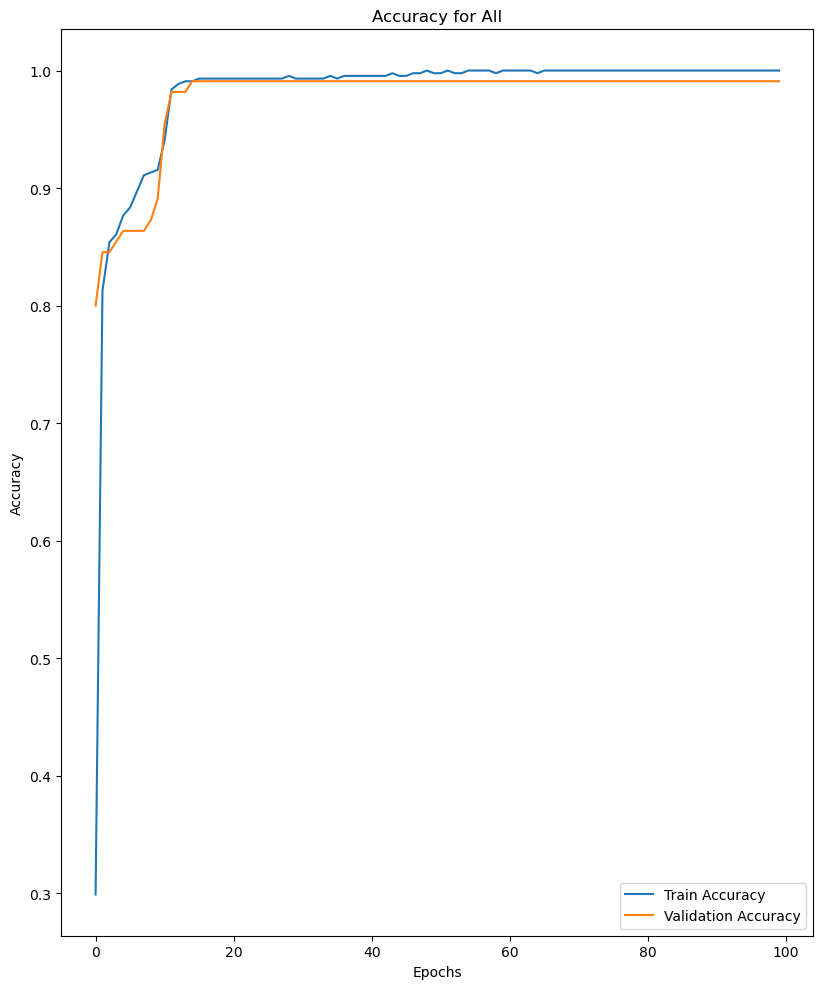

In [114]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Accuracy for {name}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


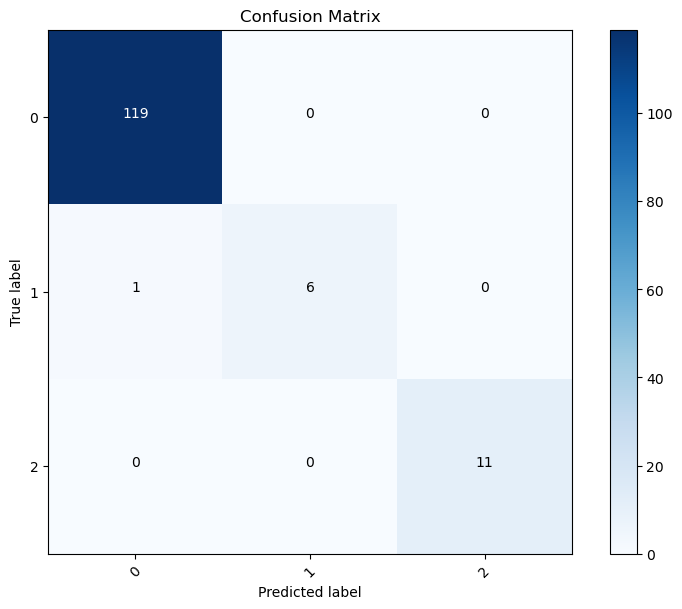

In [161]:
from sklearn.preprocessing import LabelEncoder
import itertools

# Define the encoder
encoder = LabelEncoder()

# Example: Let's say you have categorical labels
data['target'] = encoder.fit_transform(data['target'])

# plot for confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Labeling for cm
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### part 2: Twitter Data Section

In [247]:
# import twitter data for problem 2
twitter_training_df = pd.read_csv('twitter_training.csv')
twitter_training_df.columns = ['tweet_id', 'entity', 'sentiment_label', 'tweet_text']
twitter_validation_df = pd.read_csv('twitter_validation.csv')
twitter_validation_df.columns = ['tweet_id', 'entity', 'sentiment_label', 'tweet_text']

# Check
print(twitter_training_df.head(10))
print(twitter_validation_df.head(10))

   tweet_id       entity sentiment_label  \
0      2401  Borderlands        Positive   
1      2401  Borderlands        Positive   
2      2401  Borderlands        Positive   
3      2401  Borderlands        Positive   
4      2401  Borderlands        Positive   
5      2402  Borderlands        Positive   
6      2402  Borderlands        Positive   
7      2402  Borderlands        Positive   
8      2402  Borderlands        Positive   
9      2402  Borderlands        Positive   

                                          tweet_text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
5  So I spent a few hours making something for fu...  
6  So I spent a couple of hours doing something f...  
7  So I spent a few hours doing something for fun...  
8  So I spent a few 

In [272]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with single space and strip leading/trailing spaces
    
    # Tokenization and stopword removal
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the preprocessing function
twitter_training_df['processed_text'] = twitter_training_df['tweet_text'].apply(preprocess_text)
twitter_validation_df['processed_text'] = twitter_validation_df['tweet_text'].apply(preprocess_text)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(twitter_training_df['processed_text'])
X_val = vectorizer.transform(twitter_validation_df['processed_text'])

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(twitter_training_df['sentiment_label'])
y_val = encoder.transform(twitter_validation_df['sentiment_label'])

# Initialize the DT
tree_classifier = DecisionTreeClassifier()

# Train 
tree_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = tree_classifier.predict(X_val)

# Evaluation
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy}')
print(classification_report(y_val, y_val_pred, target_names=encoder.classes_))


Validation Accuracy: 0.8908908908908909
              precision    recall  f1-score   support

  Irrelevant       0.91      0.85      0.88       171
    Negative       0.90      0.93      0.92       266
     Neutral       0.89      0.87      0.88       285
    Positive       0.87      0.90      0.88       277

    accuracy                           0.89       999
   macro avg       0.89      0.89      0.89       999
weighted avg       0.89      0.89      0.89       999



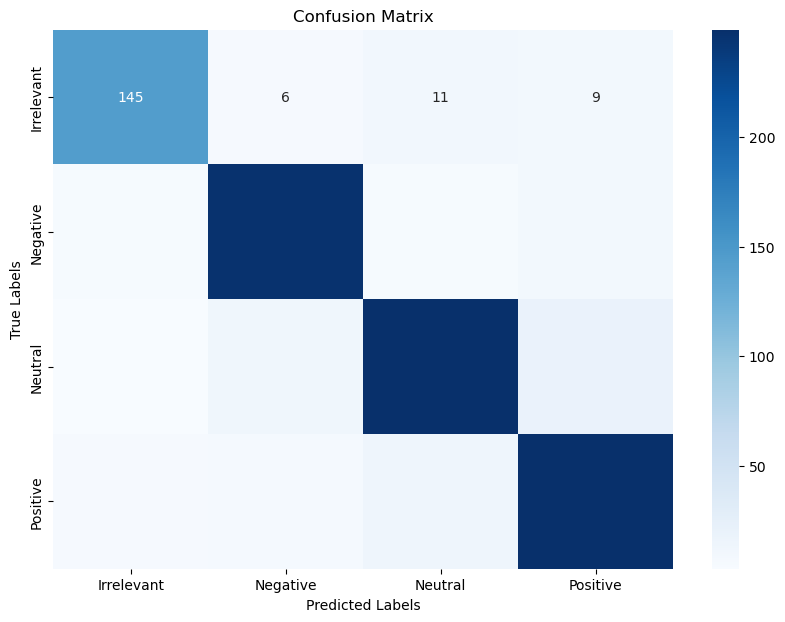

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm_dt = confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
